In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset with specific columns
columns_to_use = [
    'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
    'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
    'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
    'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
    'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
    'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
    'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
    'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
    'Absences'
]

data = pd.read_csv("C:/Users/PRAJAKTA/Desktop/HRDataset_v14 (1).csv", usecols=columns_to_use)

# Display the first few rows of the dataset
print(data.head())

# Understanding the dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Handling missing values
# Fill missing numerical values with the mean of the column
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing categorical values with the mode of the column
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Encoding categorical variables
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Convert DateofHire and DateofTermination to datetime and calculate tenure
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['Tenure'] = (data['DateofTermination'] - data['DateofHire']).dt.days.fillna(0)

# Feature selection or engineering
data = data.drop(['Employee_Name', 'EmpID', 'Position', 'State', 'Zip',
                  'DOB', 'TermReason', 'ManagerName', 'LastPerformanceReview_Date',
                  'DateofHire', 'DateofTermination'], axis=1)

# Splitting data into features and target
X = data.drop('Termd', axis=1)  # 'Termd' is the target column
y = data['Termd']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualizing feature importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()

# Visualizing correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
columns_to_use = [
    'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
    'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
    'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
    'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
    'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
    'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
    'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
    'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
    'Absences'
]

In [3]:
data = pd.read_csv("C:/Users/PRAJAKTA/Desktop/HRDataset_v14 (1).csv", usecols=columns_to_use)

In [4]:
print(data.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
print(data.describe())

              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25156.636930   
min      1.000

In [7]:
print(data.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [8]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

In [9]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [11]:
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [12]:
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['Tenure'] = (data['DateofTermination'] - data['DateofHire']).dt.days.fillna(0)

In [13]:
data = data.drop(['Employee_Name', 'EmpID', 'Position', 'State', 'Zip',
                  'DOB', 'TermReason', 'ManagerName', 'LastPerformanceReview_Date',
                  'DateofHire', 'DateofTermination'], axis=1)

In [14]:
X = data.drop('Termd', axis=1)  # 'Termd' is the target column
y = data['Termd']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[41  0]
 [ 0 22]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        22

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63


Accuracy Score: 1.0


In [20]:
feature_importances = model.feature_importances_
features = X.columns

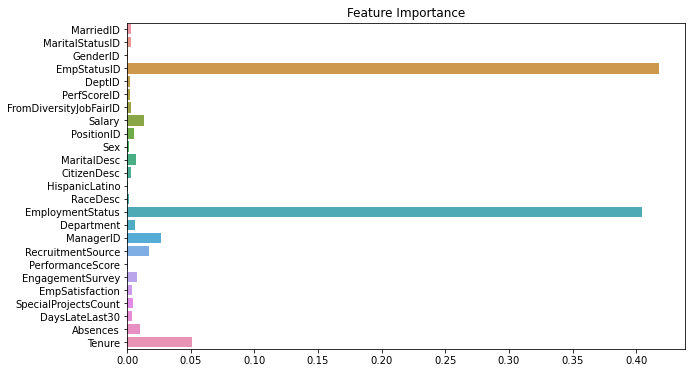

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()

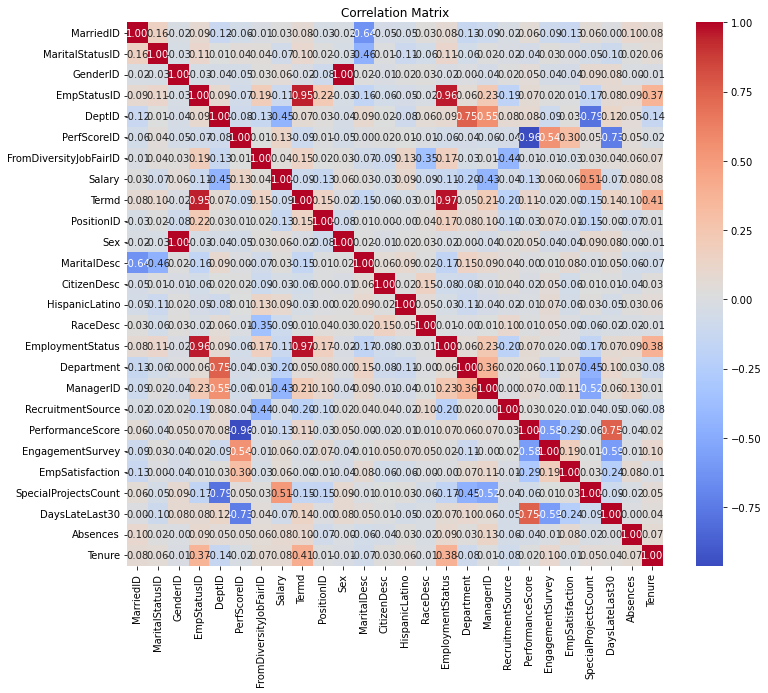

In [22]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()